# *Imports*⬇️

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
databasePath="E:\khabra\database.sqlite"

In [3]:
connection=sqlite3.connect(databasePath)

In [4]:
allTable=pd.read_sql("select * from sqlite_master where type='table';",connection)

In [5]:
allTable

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


# *List All the Countries*⬇️

In [6]:
allCountries=pd.read_sql("select * from country",connection)

In [7]:
allCountries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


# *List All The Leagues Along With Country*⬇️

In [8]:
allLeagues=pd.read_sql('select lg.id, lg.name league , lg.country_id,ct.name as country  from league lg join country ct on ct.id=lg.country_id',connection)

In [9]:
allLeagues

,id,league,country_id,country
0,1,Belgium Jupiler League,1,Belgium
1,1729,England Premier League,1729,England
2,4769,France Ligue 1,4769,France
3,7809,Germany 1. Bundesliga,7809,Germany
4,10257,Italy Serie A,10257,Italy
5,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,Poland Ekstraklasa,15722,Poland
7,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,Scotland Premier League,19694,Scotland
9,21518,Spain LIGA BBVA,21518,Spain


# *List Top 10 Teams Ordered By Team long Name*⬇️

In [10]:
topTeams=pd.read_sql("select * from team order by team_long_name limit 10",connection)

In [11]:
topTeams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


# *List Details of Top 5 Matches Played in Year 2015 Having Highest Goals*⬇️

In [12]:
matchDetails=pd.read_sql("select ma.id,ma.match_api_id match_id,lg.name league,ma.season,t1.team_short_name  home_team, t2.team_short_name away_team, ma.home_team_goal, ma.away_team_goal from match ma left join league lg on ma.league_id= lg.id left join team t1 on t1.team_api_id=ma.home_team_api_id left join team t2 on t2.team_api_id= ma.away_team_api_id  where date>='2015-01-01' and date<= '2015-12-31' order by (home_team_goal+away_team_goal) desc limit 5 ",connection)

In [13]:
matchDetails

,id,match_id,league,season,home_team,away_team,home_team_goal,away_team_goal
0,24248,2030233,Spain LIGA BBVA,2015/2016,REA,RAY,10,2
1,24016,1778322,Spain LIGA BBVA,2014/2015,REA,GRA,9,1
2,24114,1778410,Spain LIGA BBVA,2014/2015,REA,GET,7,3
3,9764,1732903,Germany 1. Bundesliga,2014/2015,LEV,WOL,4,5
4,15356,1712694,Netherlands Eredivisie,2014/2015,NAC,GRO,4,5


# *Aggregate Performance of a country in each league*⬇️

In [14]:
countryPerformance=pd.read_sql("""SELECT Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_goals, 
                                        avg(away_team_goal) AS avg_away_team_goals, 
                                        avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                        avg(home_team_goal+away_team_goal) AS avg_goals, 
                                        sum(home_team_goal+away_team_goal) AS total_goals                                       
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                GROUP BY Country.name, League.name,season
                                ORDER BY Country.name, League.name, season DESC
                                ;""",connection)

In [15]:
countryPerformance

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_goals,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,Belgium,Belgium Jupiler League,2015/2016,30,16,1.675000,1.216667,0.458333,2.891667,694
1,Belgium,Belgium Jupiler League,2014/2015,30,16,1.566667,1.216667,0.350000,2.783333,668
2,Belgium,Belgium Jupiler League,2013/2014,6,4,1.500000,1.000000,0.500000,2.500000,30
3,Belgium,Belgium Jupiler League,2012/2013,30,16,1.562500,1.366667,0.195833,2.929167,703
4,Belgium,Belgium Jupiler League,2011/2012,30,16,1.754167,1.125000,0.629167,2.879167,691
...,...,...,...,...,...,...,...,...,...,...
83,Switzerland,Switzerland Super League,2012/2013,36,10,1.511111,1.055556,0.455556,2.566667,462
84,Switzerland,Switzerland Super League,2011/2012,36,10,1.450617,1.172840,0.277778,2.623457,425
85,Switzerland,Switzerland Super League,2010/2011,36,10,1.572222,1.411111,0.161111,2.983333,537
86,Switzerland,Switzerland Super League,2009/2010,36,10,1.994444,1.333333,0.661111,3.327778,599


In [16]:
def plot_metrics(country, league, df):
    subset = df[(df['country_name'] == country) & (df['league_name'] == league)]
    
    fig, axs = plt.subplots(4, 1, figsize=(10, 20), sharex=True)
    
    axs[0].plot(subset['season'], subset['avg_home_team_goals'], marker='o')
    axs[0].set_title(f'Average Home Team Goals - {league}')
    axs[0].set_ylabel('Avg Home Team Goals')
    
    axs[1].plot(subset['season'], subset['avg_away_team_goals'], marker='o', color='orange')
    axs[1].set_title(f'Average Away Team Goals - {league}')
    axs[1].set_ylabel('Avg Away Team Goals')
    
    axs[2].plot(subset['season'], subset['avg_goal_dif'], marker='o', color='green')
    axs[2].set_title(f'Average Goal Difference - {league}')
    axs[2].set_ylabel('Avg Goal Difference')
    
    axs[3].plot(subset['season'], subset['total_goals'], marker='o', color='red')
    axs[3].set_title(f'Total Goals - {league}')
    axs[3].set_ylabel('Total Goals')
    axs[3].set_xlabel('Season')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


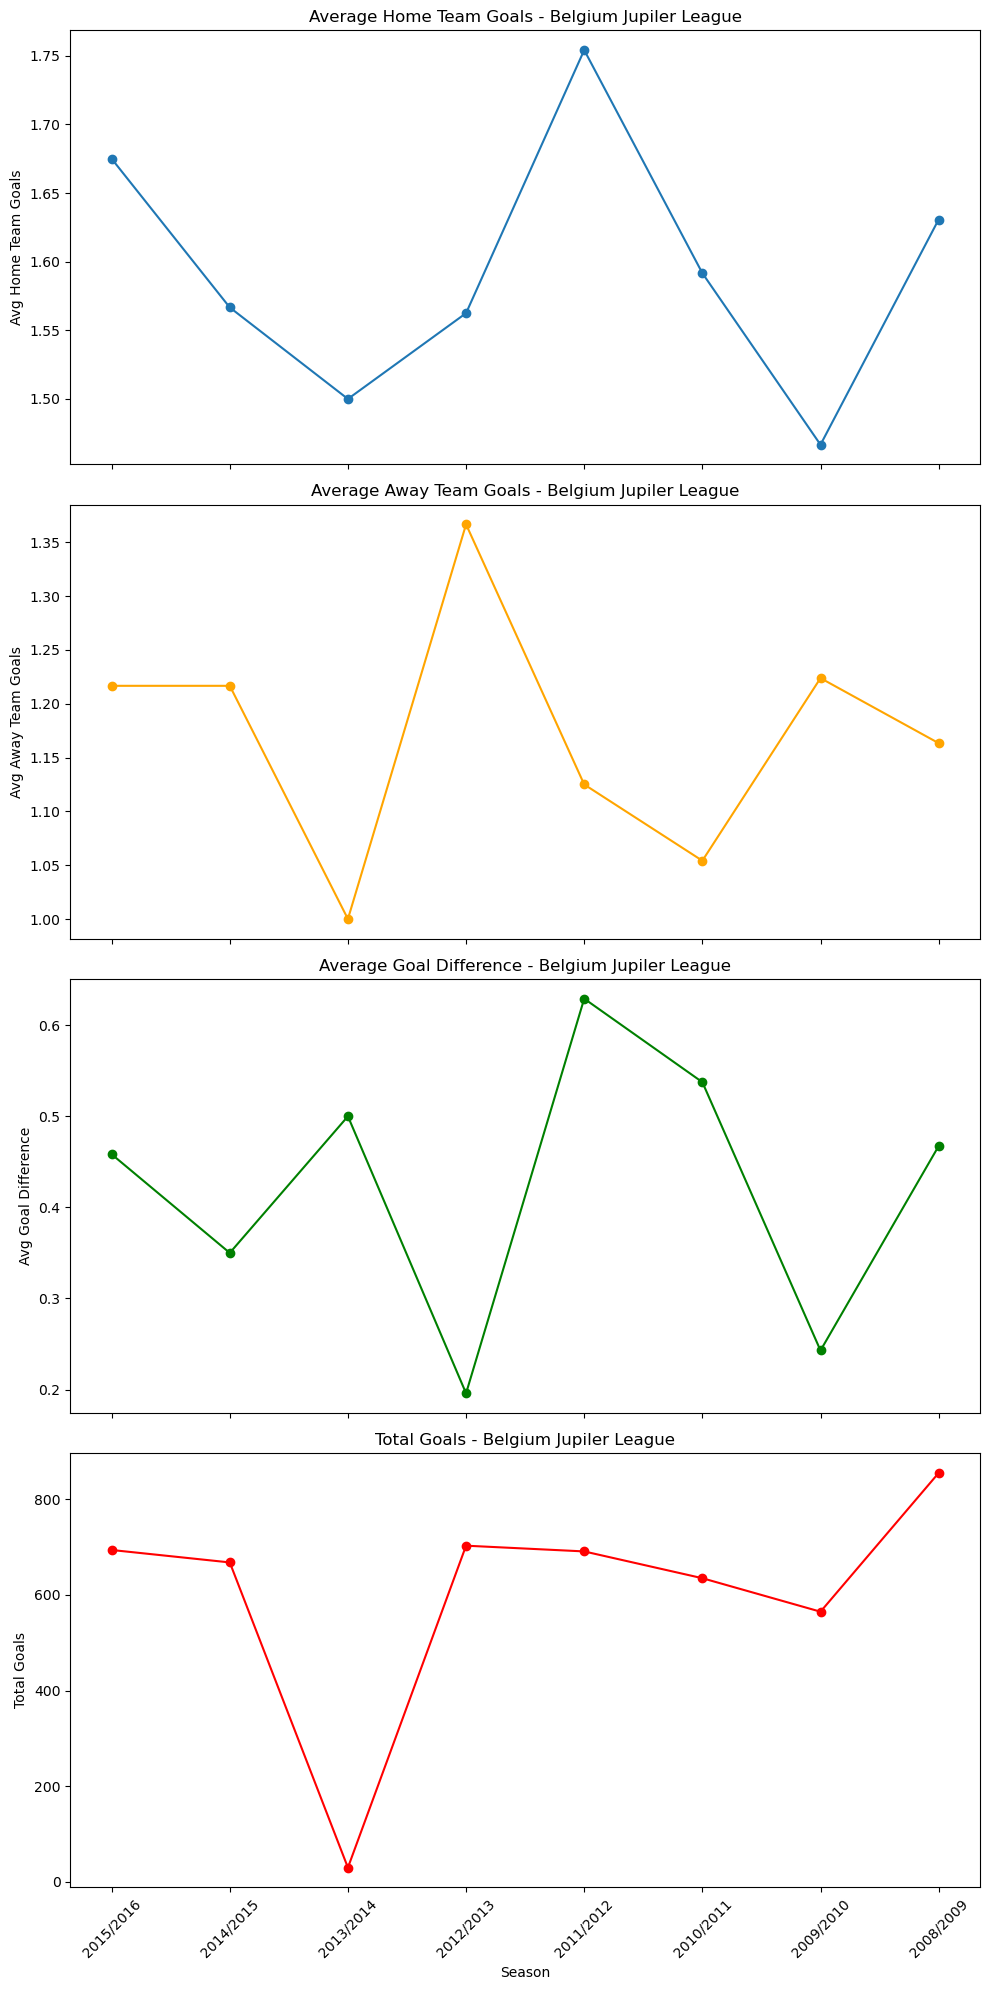

In [17]:
plot_metrics('Belgium', 'Belgium Jupiler League', countryPerformance)

# *Total Goals Scored in a league* ⬇️

In [54]:
most_goal_scored_leaguewise = pd.read_sql('''
                                          select l.name Leagues, sum(home_team_goal+away_team_goal) Goals_Scored
                                          from league l
                                          left join match m
                                          on l.id = m.league_id
                                          group by m.league_id
                                          order by Goals_Scored desc; 
                                          ''', connection)
most_goal_scored_leaguewise

,Leagues,Goals_Scored
0,Spain LIGA BBVA,8412
1,England Premier League,8240
2,Italy Serie A,7895
3,Netherlands Eredivisie,7542
4,France Ligue 1,7427
5,Germany 1. Bundesliga,7103
6,Portugal Liga ZON Sagres,5201
7,Belgium Jupiler League,4841
8,Scotland Premier League,4804
9,Poland Ekstraklasa,4656


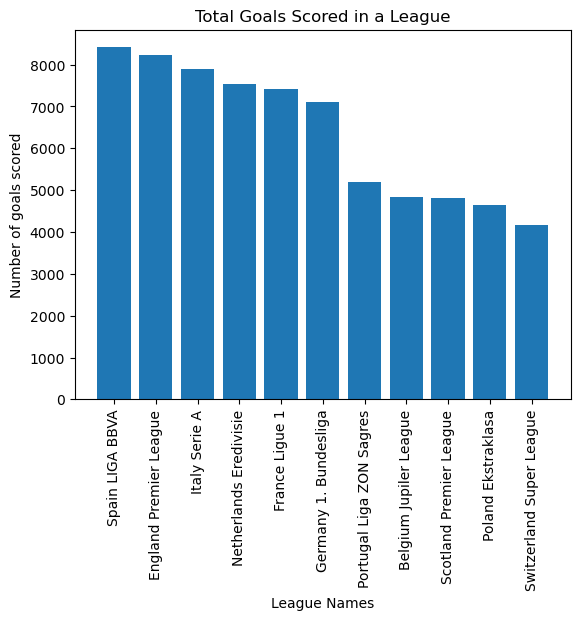

In [59]:
plt.bar(most_goal_scored_leaguewise['Leagues'], most_goal_scored_leaguewise['Goals_Scored'])
plt.title("Total Goals Scored in a League")
plt.xlabel("League Names")
plt.ylabel("Number of goals scored")
plt.xticks(rotation=90)
plt.show()

# *Evaluating Players on Preferred Foot*⬇️

In [70]:
player_possibilities = pd.read_sql('''
                                   select preferred_foot, round(avg(overall_rating),2) overall_rating, round(avg(potential),2) potential
                                   from player_attributes pa
                                   group by preferred_foot
                                   having count(overall_rating) > 0 and count(potential) > 0;
                                   ''', connection)
player_possibilities

,preferred_foot,overall_rating,potential
0,left,68.63,73.51
1,right,68.59,73.45


# *Teams with maximum chance of shoot creation divided on the basis of class*⬇️

In [85]:
team_attr = pd.read_sql('''
                        select buildUpPlayPassingClass as Playing_class, round(avg(chanceCreationShooting),2) as Chances_shoot, round(avg(buildUpPlayPassing),2) as Play_passing, round(avg(defencePressure),2) as Defence_pressure
                        from team_attributes ta
                        group by buildUpPlayPassingClass
                        ''', connection)
team_attr

,Playing_class,Chances_shoot,Play_passing,Defence_pressure
0,Long,55.62,70.23,46.31
1,Mixed,53.31,48.77,46.06
2,Short,59.09,29.79,45.38
